# Grupos: A , I
integrantes: 
- Javier Vallejos 
- Frida Aduviri
- Licet Ancari

##### CIFAR-10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html
##### Consiste en 60000 imagenes de 32x32
##### Clasificacion de 10 clases: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck


In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Cargar y dividir el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar las imágenes al rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Crear el modelo de red convolucional
model = models.Sequential([
    # Capa de convolución 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.0),
    # Capa de convolución 2
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Capa de convolución 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Capa completamente conectada (flatten)
    layers.Flatten(),
    
    # Capas completamente conectadas
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 clases de salida para CIFAR-10
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)         

In [16]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5202 - accuracy: 0.4449 - val_loss: 1.2840 - val_accuracy: 0.5337
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1610 - accuracy: 0.5861 - val_loss: 1.0481 - val_accuracy: 0.6286
Epoch 3/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0163 - accuracy: 0.6423 - val_loss: 1.0055 - val_accuracy: 0.6430
Epoch 4/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9155 - accuracy: 0.6781 - val_loss: 0.9135 - val_accuracy: 0.6833
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8371 - accuracy: 0.7051 - val_loss: 0.9798 - val_accuracy: 0.6687
Epoch 6/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7769 - accuracy: 0.7274 - val_loss: 0.8471 - val_accuracy: 0.7057
Epoch 7/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7318 - accuracy: 0.7420 - val_loss: 0.8336 -

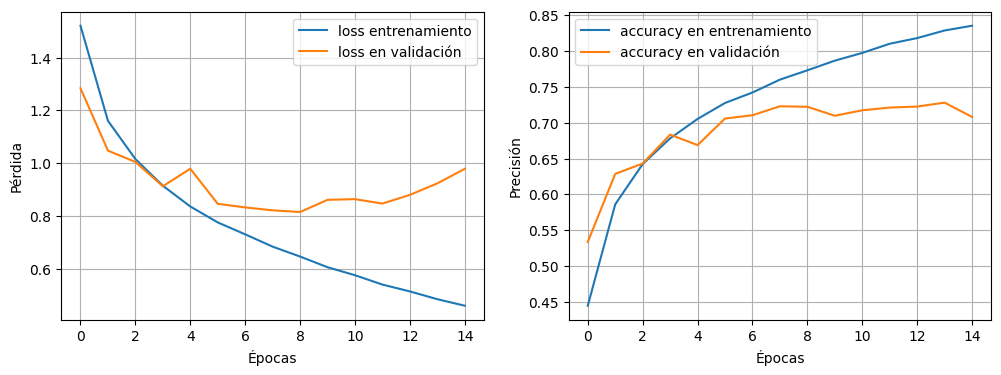

In [17]:
import matplotlib.pyplot as plt

# Graficar la pérdida (loss) en el conjunto de entrenamiento y en el conjunto de validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss entrenamiento')
plt.plot(history.history['val_loss'], label='loss en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.grid()
plt.legend()

# Graficar la precisión (accuracy) en el conjunto de entrenamiento y en el conjunto de validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy en entrenamiento')
plt.plot(history.history['val_accuracy'], label='accuracy en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

plt.show()

In [18]:
# Evaluar la precisión del modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nPrecisión en el conjunto de prueba:", test_acc)

313/313 - 2s - loss: 0.9793 - accuracy: 0.7079 - 2s/epoch - 6ms/step

Precisión en el conjunto de prueba: 0.7078999876976013
